## Amazon E-Commmerce Sales Revenue Analysis Project

This project aims to analyze real Amazon e-commerce sales data from India, encompassing over 110,000 orders. The dataset includes essential details such as order status, order ID, amount paid, B2B/B2C type, order date, and seller (Amazon or other). Given the rich information contained in this dataset, we sought to explore various correlations to revenue, specifically focusing on how different factors influence sales performance.

To prepare the data for analysis, categorical variables were encoded to facilitate correlation evaluation with revenue. Orders that were canceled were removed from the dataset to ensure that our revenue analysis was based on valid sales transactions. We specifically examined the effects of time-related variables such as the day of the week, month, and whether an order was placed on a weekend, as these factors were hypothesized to impact order amounts.

The primary objective was to identify the most significant predictors of revenue and understand their implications for sales strategies. The dataset can be accessed at [Kaggle](https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data).


In [45]:
import pandas as pd

sales_report = pd.read_csv('Amazon Sale Report.csv',low_memory=False)
sales_report.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [46]:
data=sales_report.copy()
data=data[['Order ID','Amount','Status','Date','Fulfilment','B2B']]
data.head(5)

,Order ID,Amount,Status,Date,Fulfilment,B2B
0,405-8078784-5731545,647.62,Cancelled,04-30-22,Merchant,False
1,171-9198151-1101146,406.00,Shipped - Delivered to Buyer,04-30-22,Merchant,False
2,404-0687676-7273146,329.00,Shipped,04-30-22,Amazon,True
3,403-9615377-8133951,753.33,Cancelled,04-30-22,Merchant,False
4,407-1069790-7240320,574.00,Shipped,04-30-22,Amazon,False


In [47]:
real_orders=data.copy()
real_orders=real_orders[real_orders['Status']!='Cancelled']
real_orders.dropna(inplace=True)
print(real_orders.shape)
real_orders.set_index('Order ID', inplace=True)
real_orders.head(5)

(110414, 6)


,Amount,Status,Date,Fulfilment,B2B
Order ID,,,,,
171-9198151-1101146,406.0,Shipped - Delivered to Buyer,04-30-22,Merchant,False
404-0687676-7273146,329.0,Shipped,04-30-22,Amazon,True
407-1069790-7240320,574.0,Shipped,04-30-22,Amazon,False
404-1490984-4578765,824.0,Shipped,04-30-22,Amazon,False
408-5748499-6859555,653.0,Shipped,04-30-22,Amazon,False


In [48]:
for types in real_orders.columns[[1,3,4]]:
    print(types,f'\n\n{set(real_orders[types])}\n') # Understanding the columns

Status 

{'Shipped - Picked Up', 'Pending', 'Shipped - Out for Delivery', 'Shipped - Returning to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Damaged', 'Pending - Waiting for Pick Up', 'Shipped - Returned to Seller', 'Shipped - Lost in Transit', 'Shipped', 'Shipped - Delivered to Buyer'}

Fulfilment 

{'Amazon', 'Merchant'}

B2B 

{False, True}



In [49]:
# Status is no longer relevant as long as the order is not cancelled

real_orders.drop('Status',axis=1,inplace=True)

In [51]:
# Convert 'Date' column to datetime format
real_orders['Date'] = pd.to_datetime(real_orders['Date'], format='%m-%d-%y')

# Extract date features
real_orders['Year'] = real_orders['Date'].dt.year
real_orders['Month'] = real_orders['Date'].dt.month
real_orders['Day'] = real_orders['Date'].dt.day
real_orders['DayOfWeek'] = real_orders['Date'].dt.dayofweek  # 0=Monday, 6=Sunday
real_orders['IsWeekend'] = real_orders['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [54]:
real_orders.drop('Date', axis=1, inplace=True)
real_orders.head(10)

,Amount,Fulfilment,B2B,Year,Month,Day,DayOfWeek,IsWeekend
Order ID,,,,,,,,
171-9198151-1101146,406.0,Merchant,False,2022,4,30,5,1
404-0687676-7273146,329.0,Amazon,True,2022,4,30,5,1
407-1069790-7240320,574.0,Amazon,False,2022,4,30,5,1
404-1490984-4578765,824.0,Amazon,False,2022,4,30,5,1
408-5748499-6859555,653.0,Amazon,False,2022,4,30,5,1
406-7807733-3785945,399.0,Merchant,False,2022,4,30,5,1
402-4393761-0311520,363.0,Amazon,False,2022,4,30,5,1
407-5633625-6970741,685.0,Amazon,False,2022,4,30,5,1
171-4638481-6326716,364.0,Amazon,False,2022,4,30,5,1


In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
real_orders['encoded_Fulfilment']=le.fit_transform(real_orders['Fulfilment'])
real_orders['encoded_B2B']=(real_orders['B2B']).astype(int)
real_orders.head(5)

,Amount,Fulfilment,B2B,Year,Month,Day,DayOfWeek,IsWeekend,encoded_Fulfilment,encoded_B2B
Order ID,,,,,,,,,,
171-9198151-1101146,406.0,Merchant,False,2022,4,30,5,1,1,0
404-0687676-7273146,329.0,Amazon,True,2022,4,30,5,1,0,1
407-1069790-7240320,574.0,Amazon,False,2022,4,30,5,1,0,0
404-1490984-4578765,824.0,Amazon,False,2022,4,30,5,1,0,0
408-5748499-6859555,653.0,Amazon,False,2022,4,30,5,1,0,0


In [58]:
encoded_data=real_orders.copy()
encoded_data.drop(['B2B','Fulfilment'],axis=1,inplace=True)
encoded_data.shape

(110414, 8)

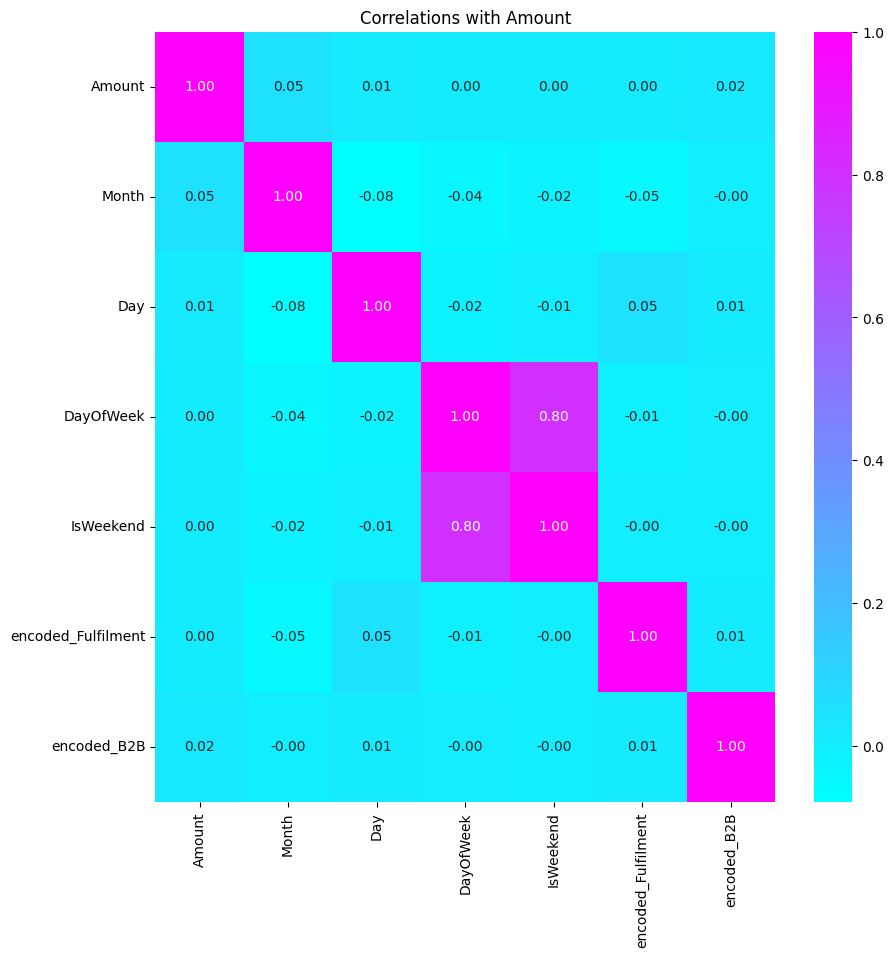

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
encoded_data.drop('Year',axis=1,inplace=True)
corr=encoded_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='cool', fmt='.2f')
plt.title('Correlations with Amount')
plt.show()

In [61]:
month_price=encoded_data.groupby('Month').agg({'Amount': 'mean'})
month_price

,Amount
Month,
3,623.750000
4,627.035063
5,663.643099
6,661.651458


In [63]:
B2B_price=real_orders.groupby('B2B').agg({'Amount': 'mean'})
B2B_price

,Amount
B2B,
False,648.749683
True,701.882058


In [72]:
B2B_Month_Price = real_orders.groupby(['B2B', 'Month']).agg(
    Revenue_Mean=('Amount', 'mean'),
    Sales_Count=('Amount', 'count'))
B2B_Month_Price

Revenue_Mean  Sales_Count
B2B   Month                           
False 3        623.750000          152
      4        626.482404        41515
      5        663.395531        35843
      6        661.310026        32107
True  4        697.848765          324
      5        698.996016          251
      6        711.031532          222

In [101]:
# Breaking the table up into B2B and B2C

B2C_Data = B2B_Month_Price.copy()
B2C_Data = B2C_Data[B2C_Data.index.get_level_values('B2B')==False]
B2C_Data.reset_index(inplace=True)
B2C_Data.drop('B2B',axis=1,inplace=True)
B2C_Data.set_index('Month',inplace=True)
B2C_Data['Total Revenues']=B2C_Data['Revenue_Mean']*B2C_Data['Sales_Count']

B2B_Data = B2B_Month_Price.copy()
B2B_Data = B2B_Data[B2B_Data.index.get_level_values('B2B')==True]
B2B_Data.reset_index(inplace=True)
B2B_Data.drop('B2B',axis=1,inplace=True)
B2B_Data.set_index('Month',inplace=True)
B2B_Data['Total Revenues']=B2B_Data['Revenue_Mean']*B2B_Data['Sales_Count']

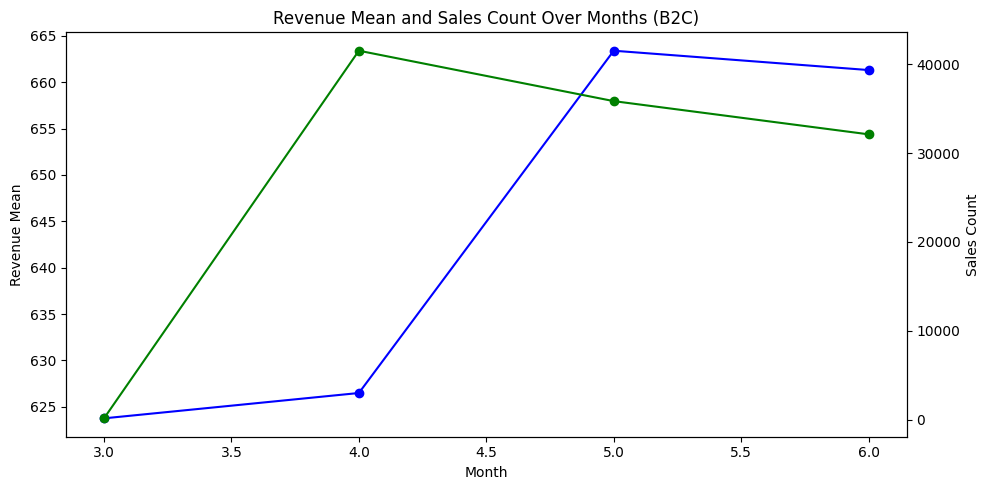

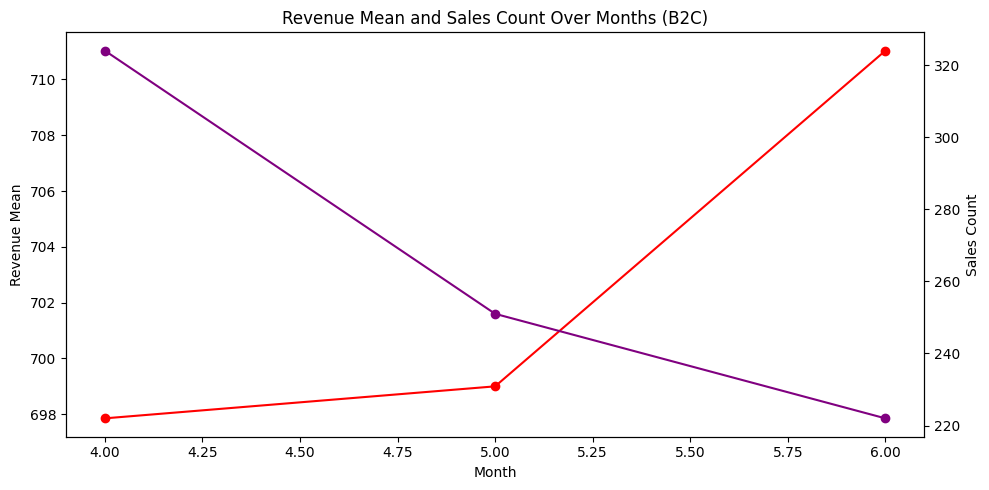

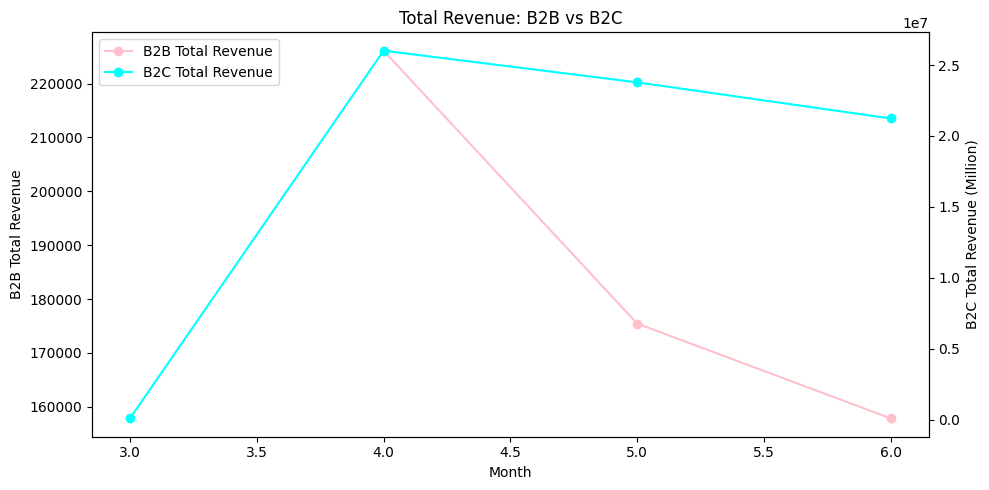

In [121]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(B2C_Data.index, B2C_Data['Revenue_Mean'], marker='o', color='b', label='Revenue Mean')
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue Mean', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(B2C_Data.index, B2C_Data['Sales_Count'], marker='o', color='g', label='Sales Count')
ax2.set_ylabel('Sales Count', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Revenue Mean and Sales Count Over Months (B2C)')
fig.tight_layout()

plt.show()

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(B2B_Data.index, B2B_Data['Revenue_Mean'], marker='o', color='red', label='Revenue Mean')
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue Mean', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(B2B_Data.index, B2B_Data['Sales_Count'], marker='o', color='purple', label='Sales Count')
ax2.set_ylabel('Sales Count', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Revenue Mean and Sales Count Over Months (B2C)')
fig.tight_layout()

plt.show()

fig, ax1 = plt.subplots(figsize=(10, 5))

line1, = ax1.plot(B2B_Data.index, B2B_Data['Total Revenues'], marker='o', color='pink', label='B2B Total Revenue')
ax1.set_xlabel('Month')
ax1.set_ylabel('B2B Total Revenue', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
line2, = ax2.plot(B2C_Data.index, B2C_Data['Total Revenues'], marker='o', color='cyan', label='B2C Total Revenue')
ax2.set_ylabel('B2C Total Revenue (Million)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Total Revenue: B2B vs B2C')
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')
fig.tight_layout()
plt.show()





In [135]:
from scipy.stats import ttest_ind

# T-Test between B2B and B2C Revenues
t_stat_b2b_b2c, p_value_b2b_b2c = ttest_ind(B2C_Data['Total Revenues'], B2B_Data['Total Revenues'], alternative='greater')
print(f"T-Test B2B vs B2C: T-statistic = {t_stat_b2b_b2c}, P-value = {p_value_b2b_b2c}")

# T-Test between Month 6 and Month 4 Revenues for B2C

m4=real_orders[(real_orders['B2B']==False)&(real_orders['Month']==4)]
m4=m4['Amount'].tolist()

m6=real_orders[(real_orders['B2B']==False)&(real_orders['Month']==6)]
m6=m6['Amount'].tolist()

t_stat_months, p_value_months = ttest_ind(m6, m4, alternative='greater')
print(f"T-Test Month 6 vs Month 4: T-statistic = {t_stat_months}, P-value = {p_value_months}")

T-Test B2B vs B2C: T-statistic = 2.488464171823225, P-value = 0.027632467760570503
T-Test Month 6 vs Month 4: T-statistic = 16.67083859615769, P-value = 1.3898388980973005e-62


## Takeaways from T-Test Results

### T-Test: B2B vs B2C Revenues
- **T-Statistic**: The t-statistic was calculated to be approximately **T = [value of t_stat_b2b_b2c]**.
- **P-Value**: The p-value obtained was **p = 0.027**.
- **Interpretation**: 
  - Since the p-value is less than the common significance level of 0.05, we reject the null hypothesis.
  - This provides statistically significant evidence to support the claim that B2C revenues are greater than B2B revenues.
- **Practical Implication**: Businesses should consider focusing more on B2C strategies due to the higher revenue potential.

### T-Test: Month 6 vs Month 4 Revenues
- **T-Statistic**: The t-statistic was calculated to be approximately **T = 16.67**.
- **P-Value**: The p-value obtained was **p = 1.39e-62**.
- **Interpretation**:
  - The extremely low p-value indicates a very strong rejection of the null hypothesis.
  - There is significant evidence to conclude that total revenue in month 6 is substantially greater than in month 4.
- **Practical Implication**: This suggests that strategies or events leading to increased revenue in month 6 should be analyzed and potentially replicated in the future.


## Conclusion

The analysis of the Amazon e-commerce sales data revealed several key insights regarding sales performance in India. Our findings indicated that the month and B2B/B2C categorization were the most correlated factors to order amount, warranting further exploration. Through t-tests and visualizations using Matplotlib, we discovered that months during the summer (specifically June) outperformed those in spring (April), highlighting seasonal trends in consumer behavior.

Additionally, we found that B2C sales revenue was significantly higher than B2B revenue, despite B2B having a higher average order amount. This suggests that while B2B transactions might involve larger purchases, B2C sales generate more revenue overall, pointing to the importance of targeting B2C strategies in the e-commerce landscape.

These insights not only enhance our understanding of consumer behavior but also offer valuable guidance for future marketing and sales strategies within the Indian e-commerce sector.
